Usaremos una base de datos del proyecto LifeWatch INBO project.. Un pequeño set de datos que consiste en la data de migracion de gulls named Eric, Nico, Sanne que tienene ocho columnas que incluyen latitud, longitud, altitud, intervalos de tiempo etc.

In [2]:
import pandas as pd
birddata = pd.read_csv("bird_tracking.csv")
birddata.info() #Vemos que hay 61920 entradas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
Unnamed: 0            61920 non-null int64
altitude              61920 non-null int64
date_time             61920 non-null object
device_info_serial    61920 non-null int64
direction             61477 non-null float64
latitude              61920 non-null float64
longitude             61920 non-null float64
speed_2d              61477 non-null float64
bird_name             61920 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 3.8+ MB


In [3]:
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [11]:
import matplotlib.pyplot as plt
import numpy as np
ix =birddata.bird_name == "Eric" #Buscaremos la data del bird llamado Eric y guardamos su indice

In [12]:
(x,y) = birddata.longitude[ix], birddata.latitude[ix] #Guardamos las coordenadas de Eric

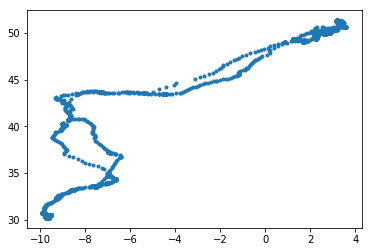

In [13]:
plt.plot(x,y,".") #Graficamos entonces las coordenadas de la migration de Eric

In [14]:
bird_names = pd.unique(birddata.bird_name) #Funcion unique de pandas y podremos ver los nombres de las aves

In [15]:
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

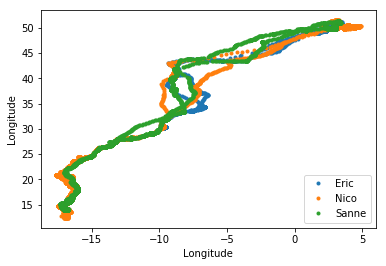

In [18]:
#Haremos la grafica de la migracion con todos los nombres

for bird_name in bird_names:
    ix=birddata.bird_name == bird_name
    (x,y) = birddata.longitude[ix], birddata.latitude[ix]
    
    plt.plot(x,y,".", label = bird_name)
    
plt.xlabel("Longitude")
plt.ylabel("Longitude")
plt.legend(loc="lower right")
plt.savefig("3traj.pdf")

Vamos a ver la data sobre la velocidad a la que viajan

/home/jrmelendezm/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jrmelendezm/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.7732e+04, 1.5020e+03, 3.6900e+02, 7.8000e+01, 1.2000e+01,
        7.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.        ,  6.34880658, 12.69761316, 19.04641974, 25.39522632,
        31.7440329 , 38.09283948, 44.44164607, 50.79045265, 57.13925923,
        63.48806581]),
 <a list of 10 Patch objects>)

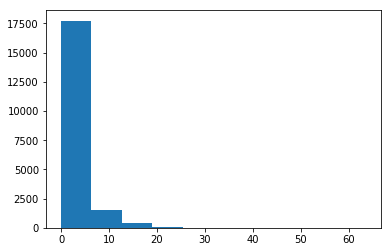

In [20]:
ix = birddata.bird_name =="Eric"
speed = birddata.speed_2d[ix]
plt.hist(speed)

In [21]:
speed[:10]

0    0.150000
1    2.438360
2    0.596657
3    0.310161
4    0.193132
5    2.904772
6    3.080584
7    2.199659
8    2.640076
9    4.592211
Name: speed_2d, dtype: float64

(array([3., 1., 0., 0., 1., 2., 2., 0., 0., 1.]),
 array([0.15      , 0.59422108, 1.03844216, 1.48266324, 1.92688432,
        2.3711054 , 2.81532648, 3.25954756, 3.70376864, 4.14798972,
        4.5922108 ]),
 <a list of 10 Patch objects>)

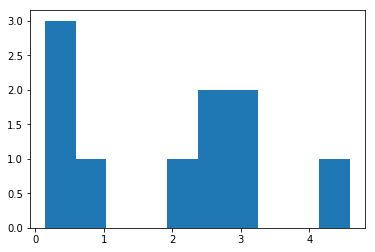

In [22]:
plt.hist(speed[:10])

In [23]:
np.isnan(speed) #Me dira si tengo datos nulos en mi arreglo (Si los hay)

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
19765    False
19766    False
19767    False
19768    False
19769    False
19770    False
19771     True
19772    False
19773    False
19774    False
19775    False
19776    False
19777    False
19778     True
19779    False
19780    False
19781    False
19782    False
19783    False
19784    False
19785    False
19786    False
19787    False
19788    False
19789    False
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool

In [24]:
np.isnan(speed).any() #Hay algun nan en mi arreglo? 

True

In [27]:
 np.sum(np.isnan(speed)) #Podemos sumar porque al ser booleanos toma los true como 1

85

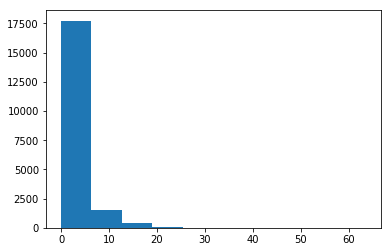

In [30]:
ind = np.isnan(speed) #Creamos un vector boolean con los indices de los nan
plt.hist(speed[~ind]) #Cambia los true por false y viceversa. Aqui veremos los histogramas de speed que los elementos
                      #Sean distintos de True. Es decir, veremos los elementos que no son nulos
plt.savefig("speed.pdf")


Text(0, 0.5, 'Frequency')

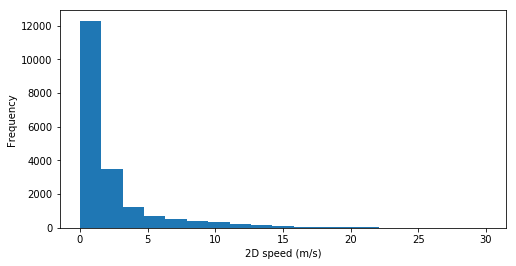

In [32]:
plt.figure(figsize=(8,4))
speed = birddata.speed_2d[birddata.bird_name == "Eric"]
ind = np.isnan(speed)
plt.hist(speed[~ind], bins=np.linspace(0,30,20)) #Especificamos los bins con linspace 
plt.xlabel("2D speed (m/s)")
plt.ylabel("Frequency")

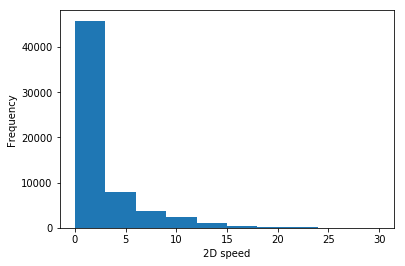

In [33]:
birddata.speed_2d.plot(kind='hist', range=[0,30]) #Haremos la grafica con pandas
plt.xlabel("2D speed")
plt.savefig("pd_hist.pdf")

Tenemos la misma grafica. EL beneficio de usar pandas en este caso es que no tuvimos que tratar con los NaNs

En python tenemos un modulo de datetime para poner manejar fechas y tiempos con operaciones. Si vemos, nuestro set de datos tiene informacion sobre fecha y tiempo

In [34]:
import datetime

datetime.datetime.today()

datetime.datetime(2020, 6, 30, 13, 35, 45, 982963)

In [35]:
time_1 = datetime.datetime.today()

In [36]:
time_2= datetime.datetime.today()

In [37]:
time_2 - time_1 # Me dara la diferencia entre la creacion de ambas variables

datetime.timedelta(seconds=10, microseconds=648090)

In [38]:
time_2=datetime.datetime.today()

In [39]:
time_2 - time_1 

datetime.timedelta(seconds=57, microseconds=637779)

El objeto computado es un timedelta. Vamos a pasar la informacion de nuestra tabla en string a un timedelta object

In [40]:
birddata.date_time[0:3]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
Name: date_time, dtype: object

In [41]:
date_str = birddata.date_time[0]
type(date_str)

str

In [42]:
date_str

'2013-08-15 00:18:08+00'

In [43]:
date_str[:-3] #los ultimos 3 caracteres se relacionan a las coordenadas de la hora

'2013-08-15 00:18:08'

In [44]:
datetime.datetime.strptime(date_str[0:-3], "%Y-%m-%d %H:%M:%S") #Los string del final especifican el formato del primer string

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [45]:
timestamps=[]
for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime\
    (birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))

In [46]:
timestamps[0:3]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58)]

In [48]:
birddata["timestamps"] = pd.Series(timestamps,index = birddata.index) #Haremos un objeto pdSeries que tenga
#la informacion de nuestro timestamps donde sus indices coinden con lso indices de birddata para hacer el match
#Eso lo guardaremos en nuestro objeto de birddata en una columna llamda timestamps

In [49]:
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamps
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [53]:
times = birddata.timestamps[birddata.bird_name == "Eric"]
elapsed_time = [time-times[0] for time in times]

In [55]:
elapsed_time[1000]

Timedelta('12 days 02:02:00')

In [56]:
elapsed_time[1000] / datetime.timedelta(days=1) #para ver la informacion en dias

12.084722222222222

In [57]:
elapsed_time[1000] / datetime.timedelta(hours=1) #Para ver la informacion en horas

290.03333333333336

In [58]:
test= birddata.timestamps[birddata.bird_name == "Sanne"]

In [59]:
test.head()

40916   2013-08-15 00:01:08
40917   2013-08-15 00:31:00
40918   2013-08-15 01:01:19
40919   2013-08-15 01:31:38
40920   2013-08-15 02:01:24
Name: timestamps, dtype: datetime64[ns]

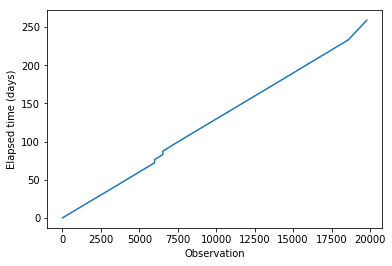

In [60]:
plt.plot(np.array(elapsed_time) / datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time (days)")
plt.savefig("timeplot.pdf")

Ahora nuestro objetivo sera una grafica donde el y-axis tenemos el mean daily speed y en la x-axis tenemos tiempo medido en dias
Veamos primero el algoritmo
Aqui tenemos que ver la velocidad promedio de los dias donde habra que reconocer cuales entradas corresponden al dia 0, dia 1 etc para usar el np.mean de las diferencias de tiempo del dia

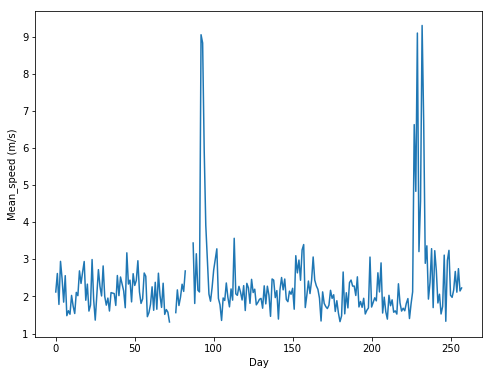

In [63]:
data= birddata[birddata.bird_name=="Eric"]
times= data.timestamps
elapsed_time = [time - times[0] for time in times]
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days=1)

next_day = 1
inds = []

daily_mean_speed = []
for (i,t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        #compute mean speed
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day += 1
        inds=[]
        
        
plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean_speed (m/s)")
plt.savefig("dms.pdf")

In [ ]:
#Aqui podemos ver que Eric vuela en promedio entre 2-3 m/s diariamente. Hay dos picos que vuela a 9 (m/s) que corresponden a los dias de migracion